# Schematic figure of depth types

Import packages

In [1]:
from IPython.display import display
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from boost_and_layouts import source_below_data


Read a synthetic 1d survey

In [2]:
survey = pd.read_csv(Path("..") / "data" / "survey_1d.csv")
display(survey)

,easting,height
0,0.00000,8.552630
1,47.03944,23.519720
2,84.45717,63.075609
3,115.99495,84.991709
4,146.99821,55.592070
5,173.19062,16.570730
6,191.36494,9.087180
7,207.93565,13.363480
8,218.09190,6.949010
9,228.24815,0.000000


## Create source distributions

In [3]:
points = {}

Source below data with constant depth

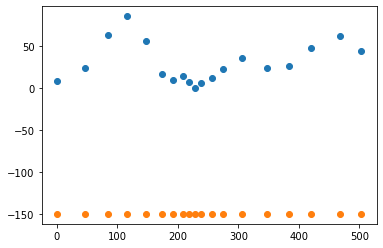

In [4]:
depth_type = "constant_depth"
coordinates = (survey.easting, np.zeros_like(survey.easting), survey.height)
points[depth_type] = source_below_data(coordinates, depth_type=depth_type, depth=150)

plt.scatter(coordinates[0], coordinates[2])
plt.scatter(points[depth_type][0], points[depth_type][2])
plt.show()

Source below data with relative depth

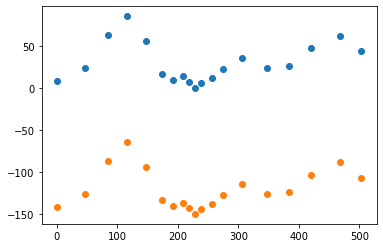

In [5]:
depth_type = "relative_depth"
coordinates = (survey.easting, np.zeros_like(survey.easting), survey.height)
points[depth_type] = source_below_data(coordinates, depth_type=depth_type, depth=150)

plt.scatter(coordinates[0], coordinates[2])
plt.scatter(points[depth_type][0], points[depth_type][2])
plt.show()

Source below data with variable depth

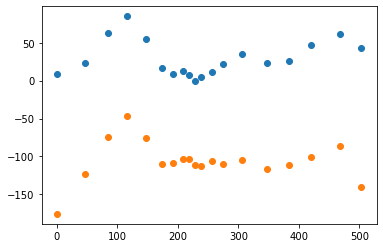

In [6]:
depth_type = "variable_depth"
coordinates = (survey.easting, np.zeros_like(survey.easting), survey.height)
points[depth_type] = source_below_data(
    coordinates, depth_type=depth_type, depth_factor=1, depth=100, k_nearest=3
)

plt.scatter(coordinates[0], coordinates[2])
plt.scatter(points[depth_type][0], points[depth_type][2])
plt.show()

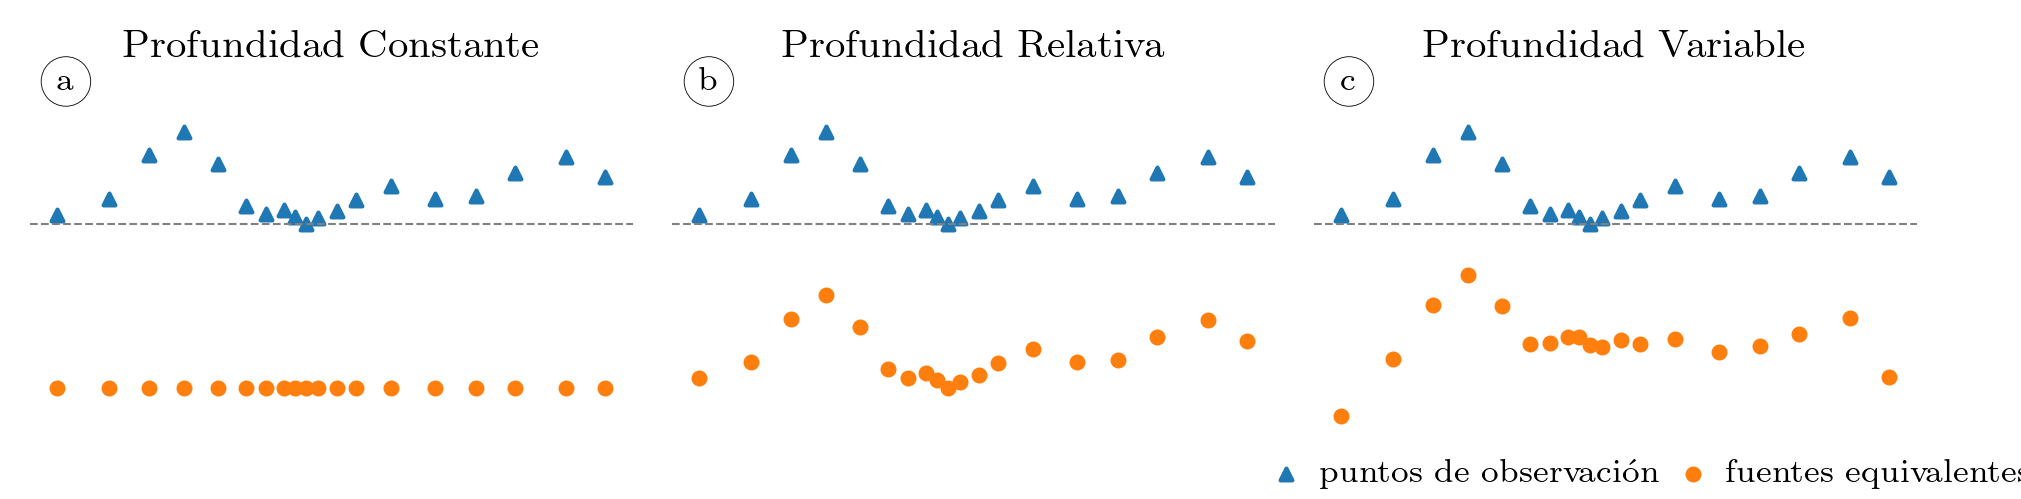

In [7]:
# Load matplotlib configuration
plt.style.use(Path(".") / "matplotlib.rc")

# Initialize figure and axes
width = 6.66
height = 1.5
fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(width, height))

# Define styles and axes labels and titles
size = 8
titles = ["Profundidad Constante", "Profundidad Relativa", "Profundidad Variable"]
labels = "a b c".split()

# Plot
for ax, depth_type, title, label in zip(axes, points, titles, labels):
    observations = ax.scatter(coordinates[0], coordinates[2], s=size, marker="^")
    sources = ax.scatter(points[depth_type][0], points[depth_type][2], s=size)
    ax.axhline(y=0, color="grey", linestyle="--", linewidth=0.5)
    ax.set_title(title)
    ax.set_aspect("equal")
    ax.axis("off")
    ax.annotate(
        label,
        xy=(0.045, 0.98),
        xycoords="axes fraction",
        bbox=dict(boxstyle="circle", fc="white", lw=0.2),
    )

plt.figlegend(
    handles=(observations, sources),
    labels=("puntos de observación", "fuentes equivalentes"),
    loc=(0.62, 0.02),
    borderpad=0,
    handletextpad=0,
    frameon=False,
    ncol=2,
    columnspacing=0,
)
axes[0].set_ylim(-200, 130)

plt.tight_layout(w_pad=0)
plt.savefig(Path("..") / "manuscript" / "figs" / "depth_types.pdf", bbox_inches="tight")
plt.show()